In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [3]:
df=pd.read_csv("loan_prediction_dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe(include='object').T

,count,unique,top,freq
Loan_ID,614,614,LP001002,1
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


In [6]:
df.drop('Loan_ID',axis=1,inplace=True)

In [7]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df[df['Gender'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [9]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [11]:
df['Gender'].fillna(np.random.choice(['Male', 'Female']), inplace=True)

In [12]:
df['Gender'].isnull().sum()

0

In [13]:
df['Gender'].value_counts()

Male      489
Female    125
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

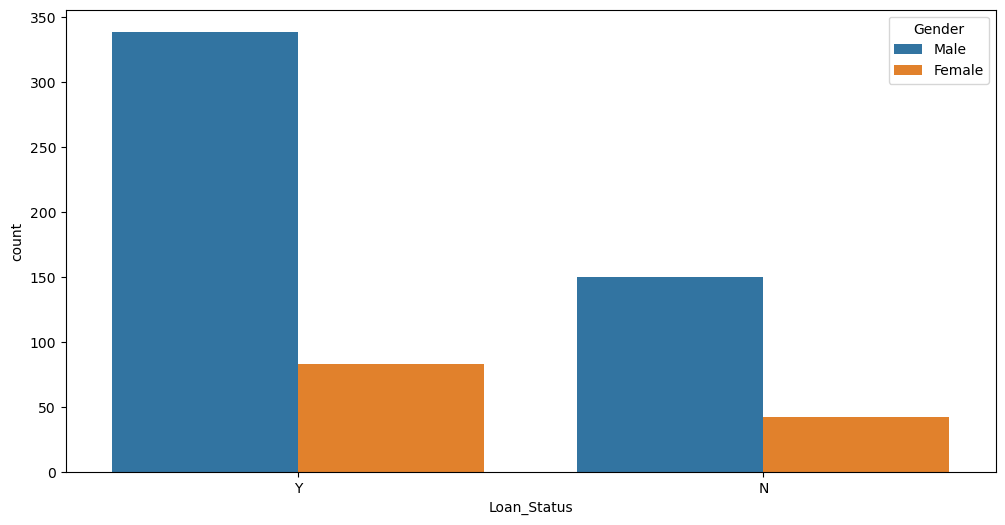

In [14]:
plt.rcParams["figure.figsize"]=(12,6)
sns.countplot(x='Loan_Status',hue='Gender',data=df)

In [15]:
df=pd.get_dummies(df,columns=['Gender'],drop_first=True)

In [16]:
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male
0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            611 non-null    object 
 1   Dependents         599 non-null    object 
 2   Education          614 non-null    object 
 3   Self_Employed      582 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
 11  Gender_Male        614 non-null    uint8  
dtypes: float64(4), int64(1), object(6), uint8(1)
memory usage: 53.5+ KB


In [18]:
## 'marriage' column
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [19]:
df['Married'].isnull().sum()

3

In [20]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [21]:
df.shape


(614, 12)

In [22]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')
df['Married']=si.fit_transform(df[['Married']])

In [23]:
df['Married'].isnull().sum()

0

In [24]:
df['Married']=le.fit_transform(df['Married'])

In [25]:
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male
0,0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1
1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            614 non-null    int32  
 1   Dependents         599 non-null    object 
 2   Education          614 non-null    object 
 3   Self_Employed      582 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
 11  Gender_Male        614 non-null    uint8  
dtypes: float64(4), int32(1), int64(1), object(5), uint8(1)
memory usage: 51.1+ KB


In [27]:
##'dependents'
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [28]:
df['Dependents'].isnull().sum()

15

In [29]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [30]:
df['Dependents']=si.fit_transform(df[['Dependents']])

In [31]:
df['Dependents'].isnull().sum()

0

In [32]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

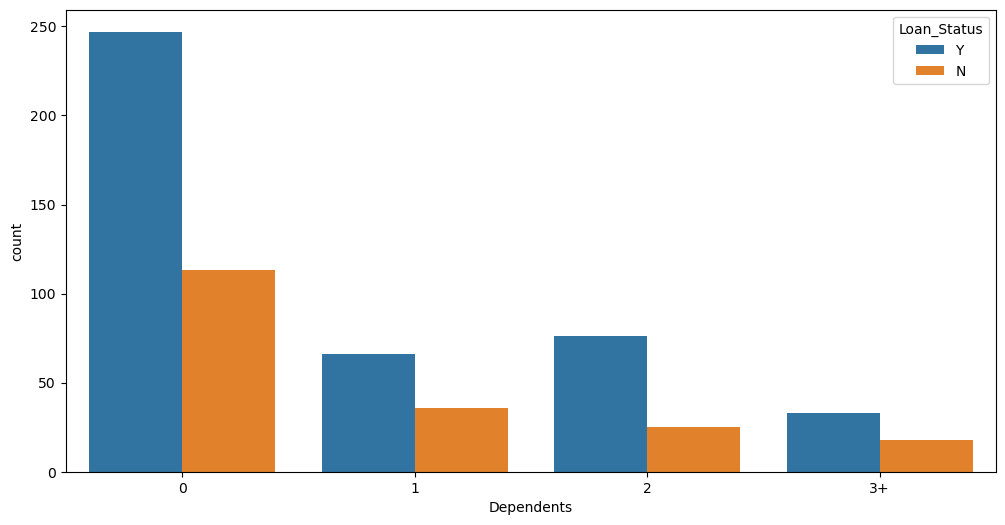

In [33]:
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

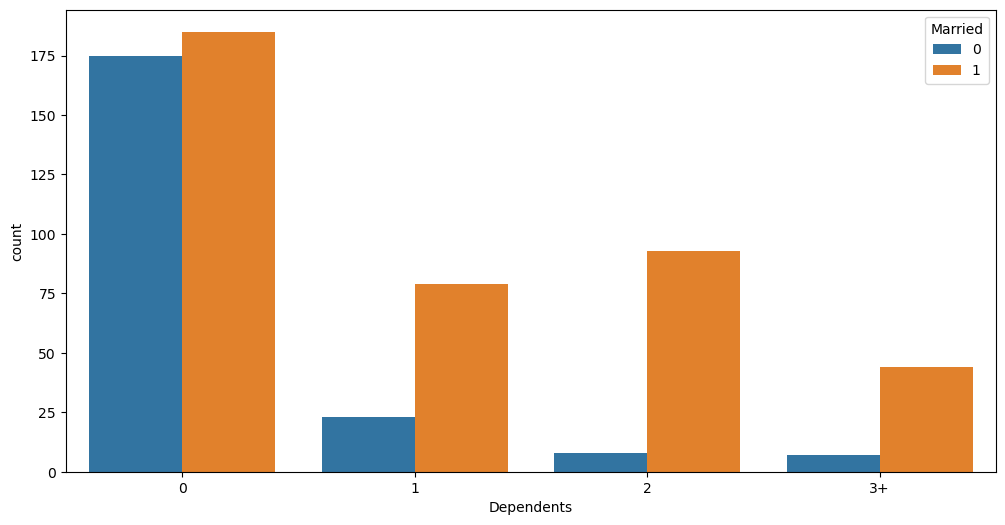

In [34]:
sns.countplot(x='Dependents',hue='Married',data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

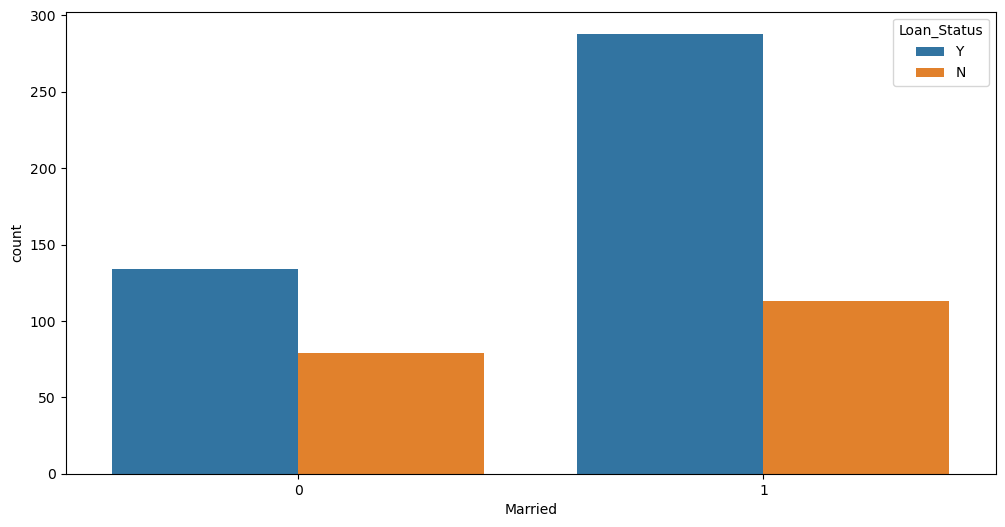

In [35]:
sns.countplot(x='Married',hue='Loan_Status',data=df)

In [36]:
df['Dependents']=df['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            614 non-null    int32  
 1   Dependents         614 non-null    int64  
 2   Education          614 non-null    object 
 3   Self_Employed      582 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
 11  Gender_Male        614 non-null    uint8  
dtypes: float64(4), int32(1), int64(2), object(4), uint8(1)
memory usage: 51.1+ KB


In [38]:
##'education'
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

<AxesSubplot:xlabel='Education', ylabel='count'>

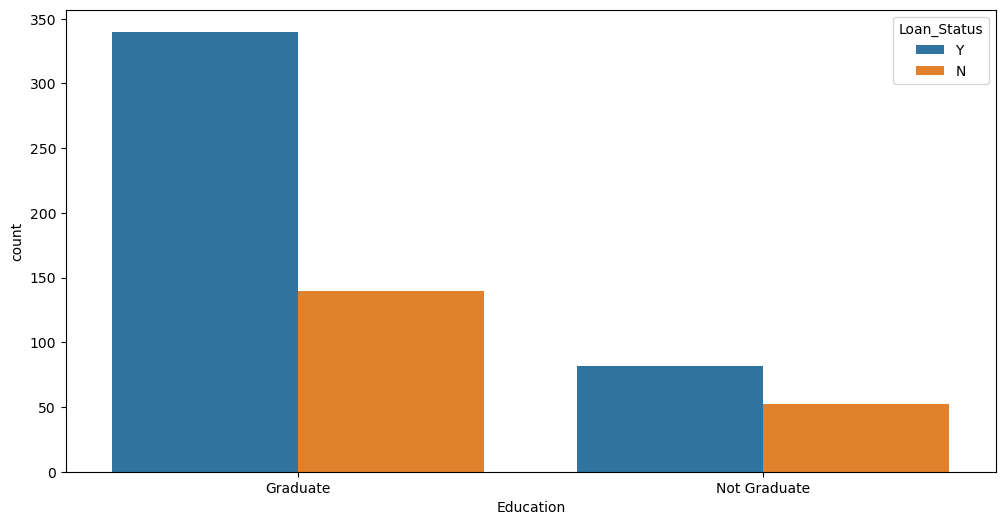

In [39]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

In [40]:
df['Education']=le.fit_transform(df['Education'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            614 non-null    int32  
 1   Dependents         614 non-null    int64  
 2   Education          614 non-null    int32  
 3   Self_Employed      582 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
 11  Gender_Male        614 non-null    uint8  
dtypes: float64(4), int32(2), int64(2), object(3), uint8(1)
memory usage: 48.7+ KB


In [42]:
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male
0,0,0,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1
1,1,1,0,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,1,0,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,1,0,1,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,0,0,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1


In [43]:
#'self_employed'
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [44]:
df['Self_Employed'].isnull().sum()

32

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

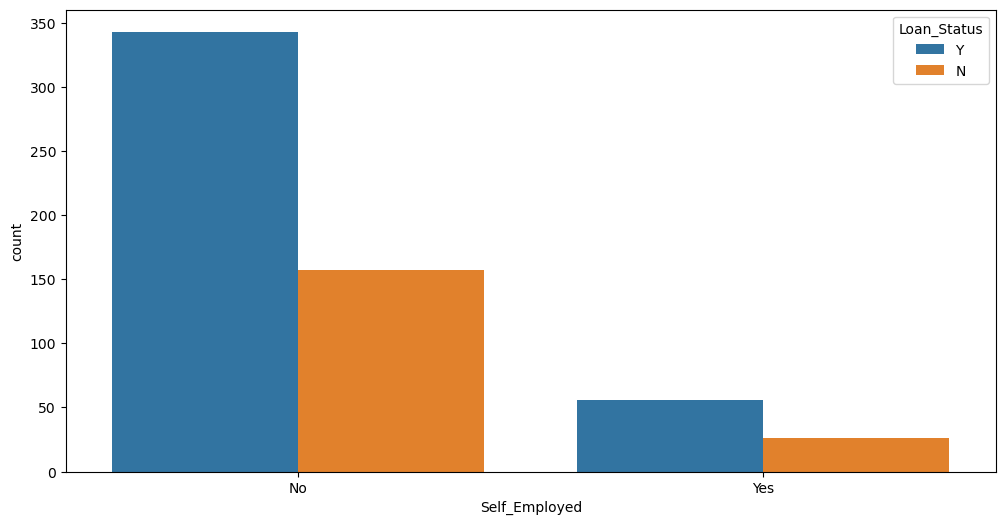

In [45]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

In [46]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [47]:
df['Self_Employed']=si.fit_transform(df[['Self_Employed']])

In [48]:
df['Self_Employed']=le.fit_transform(df['Self_Employed'])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            614 non-null    int32  
 1   Dependents         614 non-null    int64  
 2   Education          614 non-null    int32  
 3   Self_Employed      614 non-null    int32  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
 11  Gender_Male        614 non-null    uint8  
dtypes: float64(4), int32(3), int64(2), object(2), uint8(1)
memory usage: 46.3+ KB


In [50]:
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            614 non-null    int32  
 1   Dependents         614 non-null    int64  
 2   Education          614 non-null    int32  
 3   Self_Employed      614 non-null    int32  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    int32  
 11  Gender_Male        614 non-null    uint8  
dtypes: float64(4), int32(4), int64(2), object(1), uint8(1)
memory usage: 43.9+ KB


In [52]:
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male
0,0,0,0,0,5849,0.0,NaN,360.0,1.0,Urban,1,1
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0,1
2,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1,1
3,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1,1
4,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1,1


In [53]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

([<matplotlib.patches.Wedge at 0x2a5e70928e0>,
 [Text(0.40661098511372595, 1.0220897743275028, 'Semiurban'),
  Text(-1.0582795633383781, -0.3000739339235115, 'Urban'),
  Text(0.67000963198199, -0.8724030565348555, 'Rural')],
 [Text(0.22178781006203233, 0.5575035132695468, '37.95%'),
  Text(-0.5772433981845698, -0.16367669123100625, '32.90%'),
  Text(0.3654597992629036, -0.4758562126553757, '29.15%')])

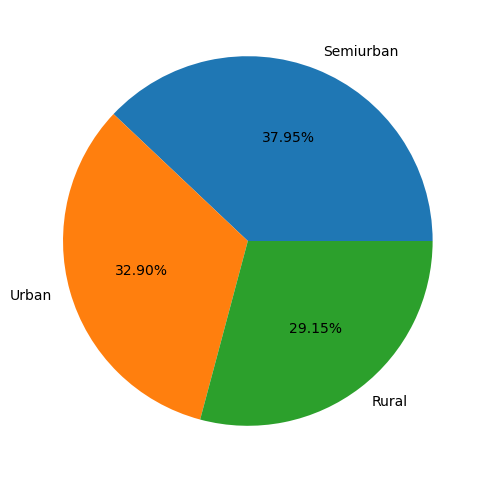

In [54]:
names=df['Property_Area'].value_counts().index
values=df['Property_Area'].value_counts()
plt.pie(values,labels=names,autopct="%1.2f%%")

In [55]:
df['Property_Area']=le.fit_transform(df['Property_Area'])

In [56]:
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male
0,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1,1
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,1
2,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,1
3,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,1
4,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,1


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

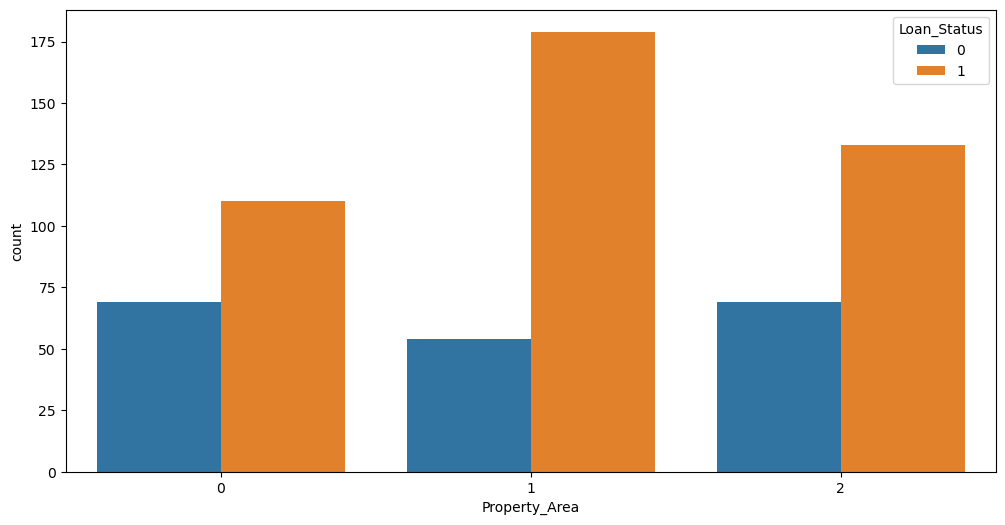

In [57]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            614 non-null    int32  
 1   Dependents         614 non-null    int64  
 2   Education          614 non-null    int32  
 3   Self_Employed      614 non-null    int32  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    int32  
 10  Loan_Status        614 non-null    int32  
 11  Gender_Male        614 non-null    uint8  
dtypes: float64(4), int32(5), int64(2), uint8(1)
memory usage: 41.5 KB


In [59]:
df['LoanAmount'].isnull().sum()

22

In [60]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [61]:
df=df.dropna(subset=['Credit_History'])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            564 non-null    int32  
 1   Dependents         564 non-null    int64  
 2   Education          564 non-null    int32  
 3   Self_Employed      564 non-null    int32  
 4   ApplicantIncome    564 non-null    int64  
 5   CoapplicantIncome  564 non-null    float64
 6   LoanAmount         543 non-null    float64
 7   Loan_Amount_Term   550 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      564 non-null    int32  
 10  Loan_Status        564 non-null    int32  
 11  Gender_Male        564 non-null    uint8  
dtypes: float64(4), int32(5), int64(2), uint8(1)
memory usage: 42.4 KB


In [63]:
si1=SimpleImputer(strategy='mean')
df['LoanAmount']=si1.fit_transform(df[['LoanAmount']])

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            564 non-null    int32  
 1   Dependents         564 non-null    int64  
 2   Education          564 non-null    int32  
 3   Self_Employed      564 non-null    int32  
 4   ApplicantIncome    564 non-null    int64  
 5   CoapplicantIncome  564 non-null    float64
 6   LoanAmount         564 non-null    float64
 7   Loan_Amount_Term   550 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      564 non-null    int32  
 10  Loan_Status        564 non-null    int32  
 11  Gender_Male        564 non-null    uint8  
dtypes: float64(4), int32(5), int64(2), uint8(1)
memory usage: 42.4 KB


In [65]:
df['Loan_Amount_Term'].value_counts()

360.0    470
180.0     43
480.0     14
300.0     10
120.0      3
240.0      3
84.0       3
60.0       2
36.0       2
Name: Loan_Amount_Term, dtype: int64

In [66]:
df['Loan_Amount_Term']=si.fit_transform(df[['Loan_Amount_Term']])

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            564 non-null    int32  
 1   Dependents         564 non-null    int64  
 2   Education          564 non-null    int32  
 3   Self_Employed      564 non-null    int32  
 4   ApplicantIncome    564 non-null    int64  
 5   CoapplicantIncome  564 non-null    float64
 6   LoanAmount         564 non-null    float64
 7   Loan_Amount_Term   564 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      564 non-null    int32  
 10  Loan_Status        564 non-null    int32  
 11  Gender_Male        564 non-null    uint8  
dtypes: float64(4), int32(5), int64(2), uint8(1)
memory usage: 42.4 KB


In [68]:
df.isnull().sum()

Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Gender_Male          0
dtype: int64

# training and testing

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [70]:
X=df.drop(columns=['Loan_Status'])
y=df['Loan_Status']

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [72]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [73]:
y_pred=model.predict(X_test)

In [75]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy*100)

Accuracy: 83.42245989304813


In [76]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
model,predictions = clf.fit(X_train,X_test,y_train,y_test)
print(predictions)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 17.99it/s]

[LightGBM] [Info] Number of positive: 257, number of negative: 120
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 306
[LightGBM] [Info] Number of data points in the train set: 377, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.681698 -> initscore=0.761584
[LightGBM] [Info] Start training from score 0.761584
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[